Gradient Desent
===
* Loss function只有一個參數就可以
* Loss function 自己設計
* 設計一下呈現方式

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact
from sympy import *

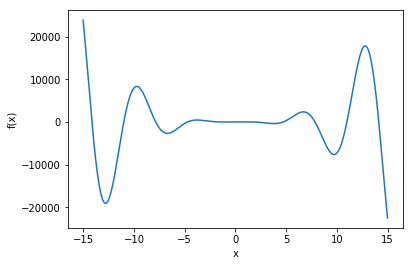

In [2]:
# create a function
def f(x):
    return (9*x**3 - 4*x**2 + 8*x + 7) * np.cos(x)

x = np.linspace(-15, 15, 1000)
y = f(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)

In [3]:
x = Symbol('x') 
diff((9*x**3 - 4*x**2 + 8*x + 7) * cos(x), x)

(27*x**2 - 8*x + 8)*cos(x) - (9*x**3 - 4*x**2 + 8*x + 7)*sin(x)

Text(0,0.5,'f(x)')

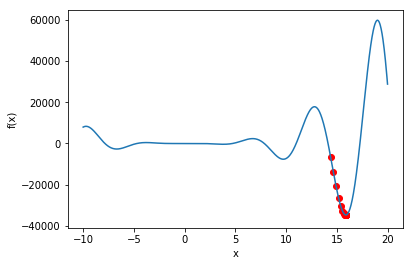

In [4]:
def gradientDescent(times, learningRate):
    x=random.uniform(-10,20)
    y = f(x)
    
    result_x = list()
    result_y = list()
    
    for i in range(0, times):
        result_x.append(x)
        result_y.append(y)
        new_x = x - learningRate * ((27*x**2 - 8*x + 8)*np.cos(x) - (9*x**3 - 4*x**2 + 8*x + 7)*np.sin(x))
        if new_x > 20 or new_x < -10:
            continue
        x = new_x
        y = f(x)      
    return result_x, result_y


learningRate = 0.00001

min_y = None
answer_x = None
answer_y = None

# 只儲存最小值，避開區域最佳解。
for i in range(0, 100):
    results = gradientDescent(100, learningRate)
    if i == 0:
        min_y = min(results[1])
        answer_x = results[0]
        answer_y = results[1]
        
    if min_y > min(results[1]):
        min_y = min(results[1])
        answer_x = results[0]
        answer_y = results[1]        


x = np.linspace(-10, 20, 1000)
plt.plot(x, f(x))
plt.scatter(answer_x, answer_y, c='r')
plt.xlabel('x')
plt.ylabel('f(x)')

### 透過互動式滑桿來得知點的變化

In [5]:
def draw(value=0):
    x = np.linspace(-10, 20, 1000)
    plt.plot(x, f(x))
    plt.scatter(answer_x[value], answer_y[value], c='r')
    plt.xlabel('x')
    plt.ylabel('f(x)')
print(len(answer_x))
interact(draw, value=(0,len(answer_x)-1))

100


interactive(children=(IntSlider(value=0, description='value', max=99), Output()), _dom_classes=('widget-intera…

<function __main__.draw(value=0)>